# Load WIOT

In [1]:
cd /home/rh/Arbeitsraum/Files/LongrunWIOD/

/home/rh/Arbeitsraum/Files/LongrunWIOD


In [2]:
import pandas as pd
import glob

df = pd.read_excel("lr_wiod_wiot_wide.xlsx",sheet_name="data")

df_col = pd.DataFrame(df.columns[3:])
df_col.columns = ["node"]

out = []
for i in range(len(df)):
    tmp = df["row_country"].iloc[i] + "_" + df["row_isic3"].iloc[i]
    out.append(tmp)
    
df_row = pd.DataFrame(list(set(out)))
df_row.columns = ["node"]

# Create Edgelist

In [3]:
%%time
nodes = set(df_row["node"])
nodes = list(nodes.intersection(set(df_col["node"])))
nodes.sort()

nodes_dict = dict()
index2nodes = dict()
for i in range(len(nodes)):
    nodes_dict.update({nodes[i]:i})
    index2nodes.update({i:nodes[i]})

    
df_index2nodes = pd.DataFrame(index2nodes.items())
df_index2nodes.columns = ["index","name"]
    
edges = []
for i in range(len(df)):
#for i in range(5):
    if i % 1000 == 0:
        print(i)
    for j in range(3,len(df.columns)):
        if df.columns[j] in nodes_dict:
            tmp = df["row_country"].iloc[i] + "_" + df["row_isic3"].iloc[i]
            if tmp in nodes_dict:
                if df.iloc[i,j] > 0:
                    send_index = nodes_dict[tmp]
                    rece_index = nodes_dict[ df.columns[j]]
                    edges.append([df["year"].iloc[i],send_index,rece_index,df.iloc[i,j]])
df_edges = pd.DataFrame(edges)


# output to file
input_file = "/home/rh/Arbeitsraum/bitbucket/share/tempgraph/open_data/LongrunWIOD/" +  "LongrunWIOD_edgelist.csv"
df_edges.to_csv(input_file,index=False,header=None)  
    
input_file_2 = "/home/rh/Arbeitsraum/bitbucket/share/tempgraph/open_data/LongrunWIOD/" +  "LongrunWIOD_index2nodes.csv"
df_index2nodes.to_csv(input_file_2,index=False) 

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
CPU times: user 13min 27s, sys: 4.58 s, total: 13min 32s
Wall time: 13min 32s


In [5]:
input_file = "/home/rh/Arbeitsraum/bitbucket/share/tempgraph/open_data/LongrunWIOD/" +  "LongrunWIOD_edgelist.csv"
input_file_2 = "/home/rh/Arbeitsraum/bitbucket/share/tempgraph/open_data/LongrunWIOD/" +  "LongrunWIOD_index2nodes.csv"


In [6]:
df_edges = pd.read_csv(input_file,header=None)
df_index2nodes = pd.read_csv(input_file_2)

In [7]:
df_edges

,0,1,2,3
0,1965,0,0,2.506249e+03
1,1965,0,1,4.177835e+01
2,1965,0,2,2.107985e+03
3,1965,0,3,2.144468e+02
4,1965,0,4,2.590720e+01
...,...,...,...,...
11929769,2000,598,594,1.914889e+05
11929770,2000,598,595,3.334791e+05
11929771,2000,598,596,6.574512e+05
11929772,2000,598,597,1.055737e+06


# Ignore

In [3]:
if 1 == 0:
    df_send = pd.DataFrame(df_edges[[0,2]].groupby(0).sum())
    df_send.reset_index(inplace=True)
    df_send.columns = ["send","agg"]

    send2agg = dict()
    for i in range(len(df_send)):
        node = df_send["send"].iloc[i]
        valu = float(df_send["agg"].iloc[i])
        send2agg.update({node:valu})

    out = []
    for i in range(len(df_edges)):
        df_edges[2].iloc[i] = df_edges[2].iloc[i] / send2agg[df_edges[0].iloc[i]]

# Digraphwave

In [60]:
cd /home/rh/Arbeitsraum/bitbucket/share/tempgraph/rh/digraphwave/

/home/rh/Arbeitsraum/bitbucket/share/tempgraph/rh/digraphwave


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import digraphwave as digw
import data_utils as datautils

file_list = glob.glob("/home/rh/Arbeitsraum/bitbucket/share/tempgraph/open_data/*_edgelist.csv")
file_list.sort()
input_file = file_list[-1]

#input_file = "bank_monthmax_agg.csv"
filetype = "csv"  # ["csv", "tsv", "edgelist"]

In [14]:
input_file

'/home/rh/Arbeitsraum/bitbucket/share/tempgraph/open_data/WIOT2014_Nov16_edgelist.csv'

In [15]:
%%time
is_weighted = True
is_directed = True
adj = datautils.read_to_spmat(input_file, filetype=filetype, is_weighted=is_weighted,
                                  directed=is_directed)

CPU times: user 1.34 s, sys: 208 ms, total: 1.55 s
Wall time: 1.55 s


In [52]:
%%time
radius = 3
kemb = 128
batch_size = 2000
is_arctan_log_transform = False  # DigraphwaveHyperparametersのデフォルト
n_flag = True  # DigraphwaveHyperparametersのデフォルト
t_flag = True  # DigraphwaveHyperparametersのデフォルト
a_flag = True  # DigraphwaveHyperparametersのデフォルト
order = 10  # DigraphwaveHyperparametersのデフォルト

param = digw.DigraphwaveHyperparameters.create(num_nodes=adj.shape[0], num_edges=adj.nnz,
                                                   R=radius, k_emb=kemb, batch_size=batch_size,
                                                   arctan_log_transform=is_arctan_log_transform,
                                                   n_flag=n_flag, 
                                                   t_flag=t_flag,
                                                   a_flag=a_flag,
                                                   order=order
                                                   )

CPU times: user 0 ns, sys: 1.71 ms, total: 1.71 ms
Wall time: 1.96 ms


In [53]:
%%time

num_gpu = 1
device_ids = list(range(num_gpu)) if num_gpu > 0 else None

embeddings = digw.digraphwave(adj=adj, param=param, device_ids=device_ids)

CPU times: user 2min 41s, sys: 24.5 s, total: 3min 6s
Wall time: 35.9 s


In [54]:
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_embedded = tsne.fit_transform(embeddings)
df_index2nodes = pd.DataFrame(index2nodes.items())

In [56]:
df_index2nodes

,0,1
0,0,AUS-1
1,1,AUS-10
2,2,AUS-11
3,3,AUS-12
4,4,AUS-13
...,...,...
2459,2459,USA-56
2460,2460,USA-6
2461,2461,USA-7
2462,2462,USA-8


In [57]:
list_countries = []
for i in range(len(df_index2nodes)):
    v1 = df_index2nodes[1].iloc[i].split("-")
    list_countries.append(v1[0])
    
list_countries = list(set(list_countries))
print(list_countries)

['CAN', 'SVK', 'AUS', 'ESP', 'SWE', 'IRL', 'SVN', 'LTU', 'LVA', 'AUT', 'TWN', 'USA', 'HRV', 'RUS', 'TUR', 'CHN', 'GBR', 'BGR', 'ITA', 'EST', 'BEL', 'LUX', 'MLT', 'BRA', 'CZE', 'FIN', 'PRT', 'POL', 'NLD', 'ROW', 'IDN', 'FRA', 'KOR', 'HUN', 'JPN', 'NOR', 'DNK', 'MEX', 'CYP', 'GRC', 'DEU', 'IND', 'ROU', 'CHE']


In [58]:
# GBR

country = "JPN"

start_index = -1
end_index = -1
for i in range(len(df_index2nodes)):
    if start_index != -1 and df_index2nodes[1].iloc[i][:3] != country:
        end_index = i
        break
    
    if start_index == -1 and  df_index2nodes[1].iloc[i][:3] == country:
        start_index = i
if end_index == -1:
    end_index = len(df_index2nodes) - 1
print(start_index)
print(end_index)

1344
1400


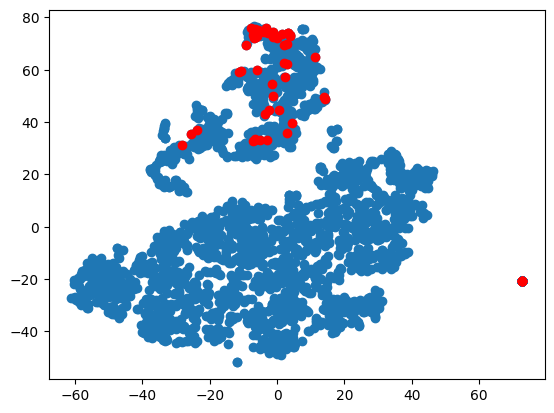

In [59]:

plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[start_index:end_index,0],X_embedded[start_index:end_index,1],color="r")